In [1]:
# Import libraries

import numpy as np
from numpy import linalg as LA
from scipy import linalg as SLA

import matplotlib
from matplotlib import pyplot as pl

In [2]:
# Construct the Liouvillian supermatrix as a function of govom (gamma over omega)

def Liouvillian(govom):
    return(np.array([[0,1j,-1j,0],[1j,0,0,-1j],[-1j,0,0,1j],[0,-1j,1j,0]]) +
           (govom/2)*np.array([[0,0,0,2],[0,-1,0,0],[0,0,-1,0],[0,0,0,-2]]) )

In [3]:
# Construct the Time Evolution superoperator as exponential of the Liouvillian

def TimeEvo(govom,time):
    return(SLA.expm(Liouvillian(govom)*time))

In [4]:
# Apply the TimeEvo to the input state

Rhoin=np.array([1,0,0,0])

def Rhooft(govom,time):
    return(np.dot(TimeEvo(govom,time),Rhoin))

In [6]:
# Extract the two canonical probabilities

def Probs(govom,time):
    return(np.array([np.real(np.dot(np.array([1,0,0,0]),Rhooft(govom,time))),
                     np.real(np.dot(np.array([0,0,0,1]),Rhooft(govom,time))) ]))

In [11]:
# Extract the sigma_vec expectation values

def Sigmas(govom,time):
    return(np.array([np.real(np.dot(np.array([0,1,-1,0]),Rhooft(govom,time))),
                     np.real(np.dot(np.array([0,-1j,1j,0]),Rhooft(govom,time))),
                     np.real(np.dot(np.array([1,0,0,-1]),Rhooft(govom,time))) ]))

In [8]:
# Create the list of recorded times (omega timescale)

time_list = np.linspace(0,60,1000)

In [24]:
# Set the gamma-over-omega value

govom = 0.3

# and calculate the list of recorded probabilities

p_list = np.array([Probs(govom,time) for time in time_list])
s_list = np.array([Sigmas(govom,time) for time in time_list])

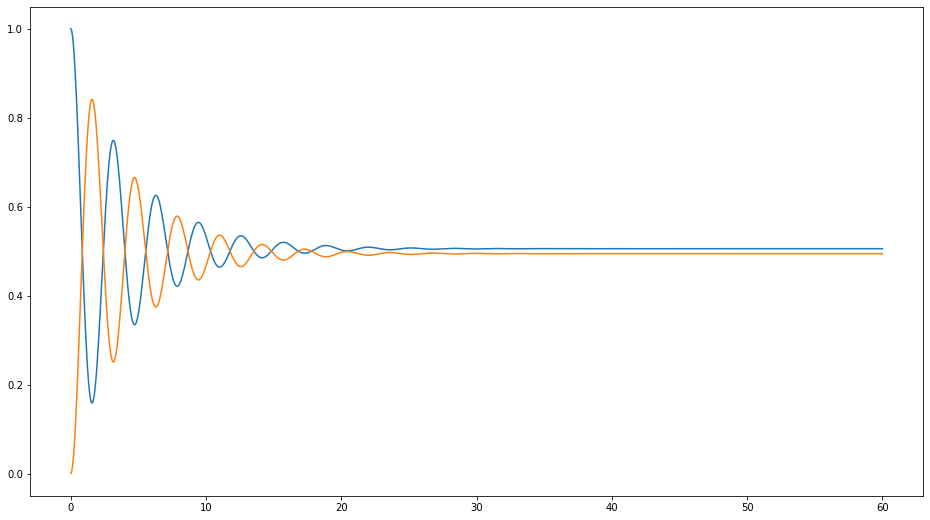

In [25]:
matplotlib.rcParams['figure.figsize'] = [16,9]
pl.figure()
pl.plot(time_list, p_list)
#pl.plot(time_list, p_list[:,0])
#pl.plot(time_list, p_list[:,1], '--')
#pl.plot(time_list, p_list[:,2], '-.')
pl.show()

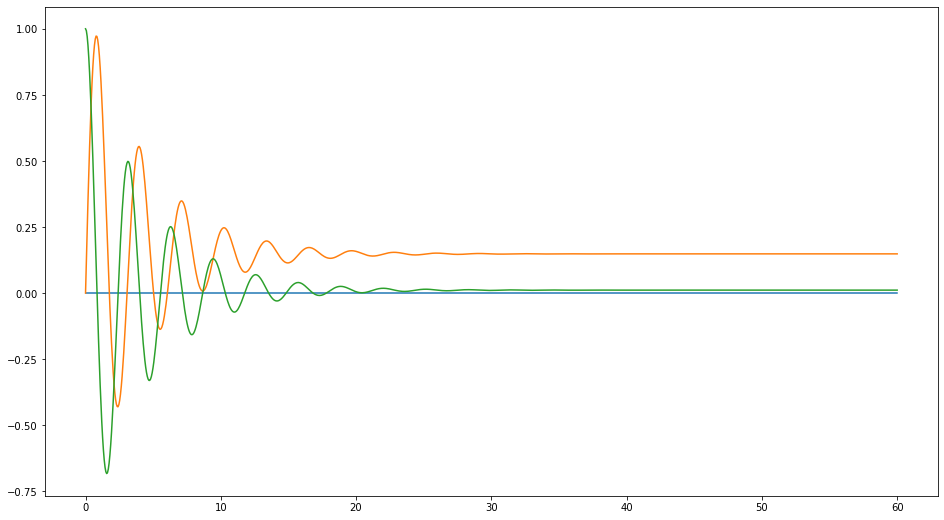

In [26]:
matplotlib.rcParams['figure.figsize'] = [16,9]
pl.figure()
pl.plot(time_list, s_list)
#pl.plot(time_list, p_list[:,0])
#pl.plot(time_list, p_list[:,1], '--')
#pl.plot(time_list, p_list[:,2], '-.')
pl.show()